In [1]:
# Dependencies
# import sys
# !{sys.executable} -m pip install numpy scipy pandas matplotlib

In [2]:
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import linprog

In [3]:
# LP problem generator
def gen_random_lp_problem(n):
    c = np.random.uniform(-1, 1, n)
    A = np.random.uniform(-1, 1, (n, n))
    b = np.random.uniform(-1, 1, n)
    
    return c, A, b

In [4]:
def get_ratio(df):
    return df['bene_1_count'].mean() / float(df_sub['bene_2_count'].mean())

In [5]:
methods = ['highs-ipm', 'highs-ds']
variable_range = range(50, 1001, 50)

In [6]:
# results = list()

# for n in variable_range:
    
#     solution = dict()
#     solution['success'] = False

#     while (not solution['success']):
#         c, A, b = gen_random_lp_problem(n)
#         solution = linprog(c=c, A_ub=A, b_ub=b, method='highs')
        
#     for trial in range(10):
#         for method in methods:
            
#             start = time.process_time()
#             linprog(c=c, A_ub=A, b_ub=b, method=method)
#             end = time.process_time()
            
#             results.append([n, trial, method, end - start])
            
# df = pd.DataFrame(results, columns=['n_variables', 'trial', 'method', 'time'])
# df.to_csv('results2.csv', index=False)

In [7]:
df = pd.read_csv('results2.csv')

# Mini-Project 1 - MATH-510 - Ozeas Carvalho

## Introduction

The simplex and the interior-point methods are the main algorithms to solve linear programming (LP) problems [1]. The simplex algorithm dominated the scene until  Karmarkar introduced a fast polynomial-time interior-point method in 1984 [2, 3]. Although the original Dantzig's simplex is inherently inefficient, improved simplex variants are still a good choice for sparse LP problems compared to interior-point methods [2]. While simplex variants traverse the vertices of the convex polytope defined by the problem constraints to find the optimal solution, interior-point methods move through solution points inside the feasible region to approximate an optimal solution.

For this first project, we would like to evaluate the performance of the linear programming solvers available in SciPy [5], a Python library used for scientific computing. SciPy implements a dual revised simplex method and an interior-point method [3, 6].

## Experiment design

Firstly, we decided to write a random LP problem generator to create the problem set. All the generated problems are feasible, bounded, and have the following form:

\begin{align*}
\text{min} \quad
c^T x& \\
\text{subject to} \quad
Ax &\leq b \\
x &\geq 0
\end{align*}

The generator takes a parameter $n_{variables}$ that defines the number of variables of the objective function and the number of contraints, which in turn determines the size of the vectors $c$, $x$, $b$, and constraint matrix $A$. The generator uniformly draws real numbers from the closed interval $(-1, 1)$ to assign the coefficients. We generated $20$ feasible LP problems varying $n_{variables}$ from $50$ to $1000$. Then we solved each LP problem $10$ times for each method to average the CPU execution time.

## Results

Table 1 contains the results aggregated by minimum, maximum, mean, and standard deviation of the CPU execution time. *highs-ds* is the dual revised simplex method, and *highs-ipm* is the interior-point method. Considering the average execution time, we can see that *highs-ds* is faster on average until the number of variables reaches $350$. The standard deviation is small (except for $n=1000$), which indicates a low variance in execution time on all trials. Table 2 has the execution time ratio for each LP problem size. We can make the same observation from Table 2, that *highs-ipm* outperforms *highs-ds* for $n > 300$. For larger instances, *highs-ds* is almost $3$ times faster.

#### Table 1 - Execution time aggregated by min, max, mean and std

In [8]:
df.pivot_table(index=['n_variables'], columns=['method'], values=['time'], aggfunc=[min, max, np.mean, np.std])

min                  max                 mean            \
                  time                 time                 time             
method        highs-ds highs-ipm   highs-ds highs-ipm   highs-ds highs-ipm   
n_variables                                                                  
50            0.001364  0.002928   0.002056  0.003321   0.001467  0.003012   
100           0.006056  0.016392   0.006766  0.017735   0.006242  0.016860   
150           0.022108  0.034537   0.022716  0.034956   0.022269  0.034664   
200           0.054487  0.067097   0.054935  0.069136   0.054638  0.067464   
250           0.103571  0.149814   0.106833  0.151270   0.104365  0.150408   
300           0.186499  0.191888   0.187905  0.193328   0.187101  0.192625   
350           0.306869  0.304368   0.309235  0.307250   0.307801  0.305836   
400           0.435402  0.392919   0.438492  0.394816   0.437046  0.393855   
450           0.674857  0.632904   0.691577  0.637286   0.678486  0.634223   
500           1.030902  0.766470   1.036913  0.768916   1.034160  0.767357   
550           1.523140  1.071696   1.535642  1.074436   1.528057  1.073052   
600           1.886364  0.983409   1.920369  1.011807   1.896218  0.988608   
650           2.688879  1.684096   2.719172  1.698321   2.700382  1.688442   
700           3.076366  1.760954   3.105560  1.766260   3.087271  1.762932   
750           4.926290  1.818241   4.961127  1.822714   4.941473  1.820918   
800           5.849091  2.426489   5.904047  2.436109   5.884292  2.430969   
850           7.707634  2.873030   7.775103  2.882125   7.734071  2.876818   
900           9.880268  3.781556   9.997466  3.802773   9.934053  3.791712   
950          11.953814  4.986329  12.103861  5.135295  12.004362  5.009121   
1000         13.490490  4.720446  19.000969  5.160067  14.368121  4.817596   

                  std            
                 time            
method       highs-ds highs-ipm  
n_variables                      
50           0.000209  0.000121  
100          0.000235  0.000459  
150          0.000174  0.000124  
200          0.000133  0.000603  
250          0.000935  0.000445  
300          0.000447  0.000460  
350          0.000847  0.000937  
400          0.001124  0.000616  
450          0.004852  0.001285  
500          0.002296  0.000838  
550          0.004056  0.000970  
600          0.012731  0.008773  
650          0.009630  0.004219  
700          0.009659  0.002097  
750          0.011861  0.001350  
800          0.018810  0.002502  
850          0.021405  0.003494  
900          0.036043  0.007150  
950          0.047354  0.045051  
1000         1.666265  0.129694

#### Table 2 - Execution time ratio $\frac{highs-ds}{highs-ipm}$

In [9]:
(df.groupby(['n_variables', 'method'])[['time']].agg([np.mean]).unstack()[('time', 'mean',  'highs-ds')] / \
df.groupby(['n_variables', 'method'])[['time']].agg([np.mean]).unstack()[('time', 'mean',  'highs-ipm')]).to_frame(name='Time ratio')

,Time ratio
n_variables,
50,0.487133
100,0.370247
150,0.642422
200,0.809875
250,0.693877
300,0.971318
350,1.006425
400,1.109663
450,1.069792


Figure 1 shows the scatter plot of the average execution time for each problem size. Although we have a small sample, we can see that the execution time seems to grow exponentially with respect to the problem size. To confirm that, we can use regression to find the approximate exponential function that describes the execution time as a function of the problem size. Figure 2 shows the exponential functions found after we applied exponential regression to the data using SciPy.

Additionally, we can also plot the original data in a *log-log* scale. In such space, exponential curves become linear functions, and we can use the inclination of the lines to compare relative exponential growth. Figure 3 has a *log-log* plot of the original data. Again, we can draw the same conclusions as before, that *highs-ds* is faster until a certain point, represented by the point where the lines intersect.

#### Figure 1 - Average execution time plot

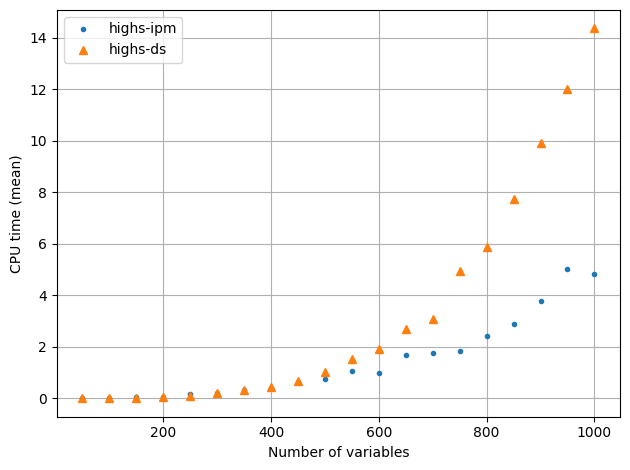

In [10]:
fig, ax = plt.subplots()

marker = {'highs-ds': '^',
          'highs-ipm': '.'}

for method in methods:
    ax.plot(df[df['method']==method].groupby(['n_variables'])[['time']].agg([np.mean]), marker[method], label=method)

ax.set_xlabel('Number of variables')
ax.set_ylabel('CPU time (mean)')
ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [11]:
x1 = df.groupby(['n_variables', 'method'])[['time']].agg([np.mean]).unstack()[('time', 'mean',  'highs-ds')].index.tolist()
y1 = df.groupby(['n_variables', 'method'])[['time']].agg([np.mean]).unstack()[('time', 'mean',  'highs-ds')].tolist()

x2 = df.groupby(['n_variables', 'method'])[['time']].agg([np.mean]).unstack()[('time', 'mean',  'highs-ipm')].index.tolist()
y2 = df.groupby(['n_variables', 'method'])[['time']].agg([np.mean]).unstack()[('time', 'mean',  'highs-ipm')].tolist()

In [12]:
# fit1 = np.polyfit(x1, np.log2(y1), 1, w=np.sqrt(y1))

# a1 = np.exp(fit1[1])
# b1 = fit1[0]
# x1_fitted = np.linspace(np.min(x1), np.max(x1), 100)
# y1_fitted = a1 * np.exp(b1 * x1_fitted)

In [13]:
fit1 = np.polyfit(x1, np.log(y1), 1, w=np.sqrt(y1))

a1 = np.exp(fit1[1])
b1 = fit1[0]
x1_fitted = np.linspace(np.min(x1), np.max(x1), 100)
y1_fitted = a1 * np.exp(b1 * x1_fitted)

In [14]:
fit2 = np.polyfit(x2, np.log(y2), 1, w=np.sqrt(y2))

a2 = np.exp(fit2[1])
b2 = fit2[0]
x2_fitted = np.linspace(np.min(x2), np.max(x2), 100)
y2_fitted = a2 * np.exp(b2 * x2_fitted)

#### Figure 2 - Exponential regression

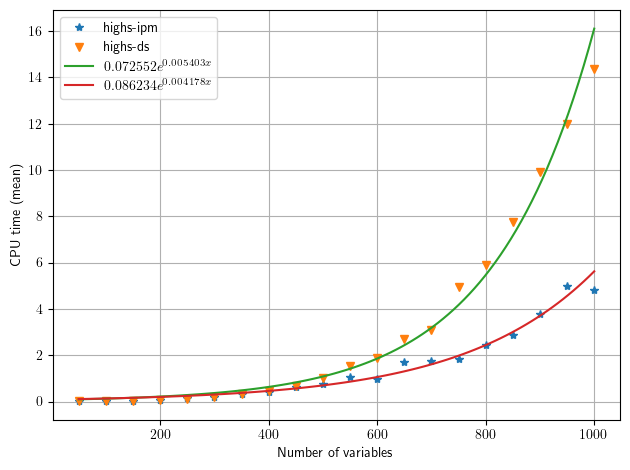

In [15]:
plt.rcParams['text.usetex'] = True

fig, ax = plt.subplots()

marker = {'highs-ds': 'v',
          'highs-ipm': '*'}

for method in methods:
    ax.plot(df[df['method']==method].groupby(['n_variables'])[['time']].agg([np.mean]), marker[method], label=method)
    
ax.plot(x1_fitted, y1_fitted, label="${%fe}^{%fx}$" % (a1, b1))
ax.plot(x2_fitted, y2_fitted, label="${%fe}^{%fx}$" % (a2, b2))

ax.set_xlabel('Number of variables')
ax.set_ylabel('CPU time (mean)')
ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

#### Figure 3 - *log-log* plot

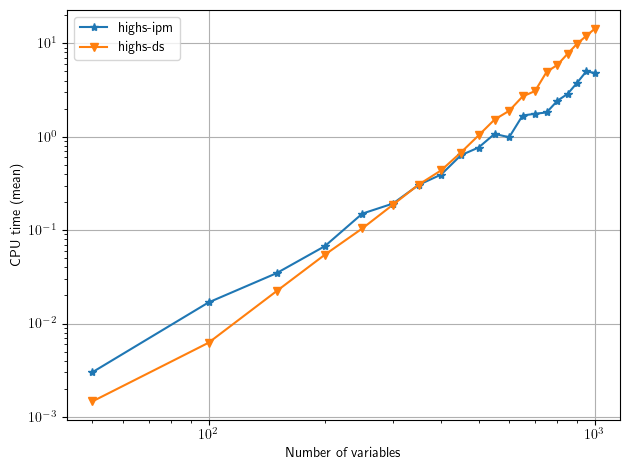

In [16]:
plt.rcParams['text.usetex'] = True

fig, ax = plt.subplots()

marker = {'highs-ds': 'v',
          'highs-ipm': '*'}

for method in methods:
    ax.plot(df[df['method']==method].groupby(['n_variables'])[['time']].agg([np.mean]), marker=marker[method], label=method)
    
# ax.plot(x1_fitted, y1_fitted, label="${%fe}^{%fx}$" % (a1, b1))
# ax.plot(x2_fitted, y2_fitted, label="${%fe}^{%fx}$" % (a2, b2))
    
ax.set_xlabel('Number of variables')
ax.set_ylabel('CPU time (mean)')
ax.set_yscale('log')
ax.set_xscale('log')

ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

## Conclusion

To the best of our knowledge, there is no definitive proof of the time complexity of the simplex algorithm. Some authors argue that the simplex method has combinatorial complexity since it can potentially visit all the polytope vertices to reach the optimal solution [1] while others estimate a polynomial time like the interior-point method [2].

As limitations, we can mention the problem space, the quality of the problem generator, and the solvers' parameter space. Although the observed results are somewhat consistent with the discussion about the time complexity, the conclusions are not statistically significant due to the small sample space. And that raises some questions. What happens if we keep increasing the number of variables? What happens if we increase or decrease the number of constraints? The tested problems have a specific structure (the number of constraints is equal to the number of variables), so we cannot safely extrapolate our conclusions. It took a considerable time to generate random feasible LP problems. A deep understanding of LP problems can help write a better random LP problem generator. Also, the SciPy LP solvers provide a variety of parameters that we did not experiment with.

## References

[1] https://arxiv.org/abs/cs/0111050v7

[2] https://epubs.siam.org/doi/10.1137/S0036144502414942

[3] https://link.springer.com/article/10.1007/BF02579150

[4] https://link.springer.com/article/10.1007/s12532-017-0130-5

[5] https://scipy.org/

[6] https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html